/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

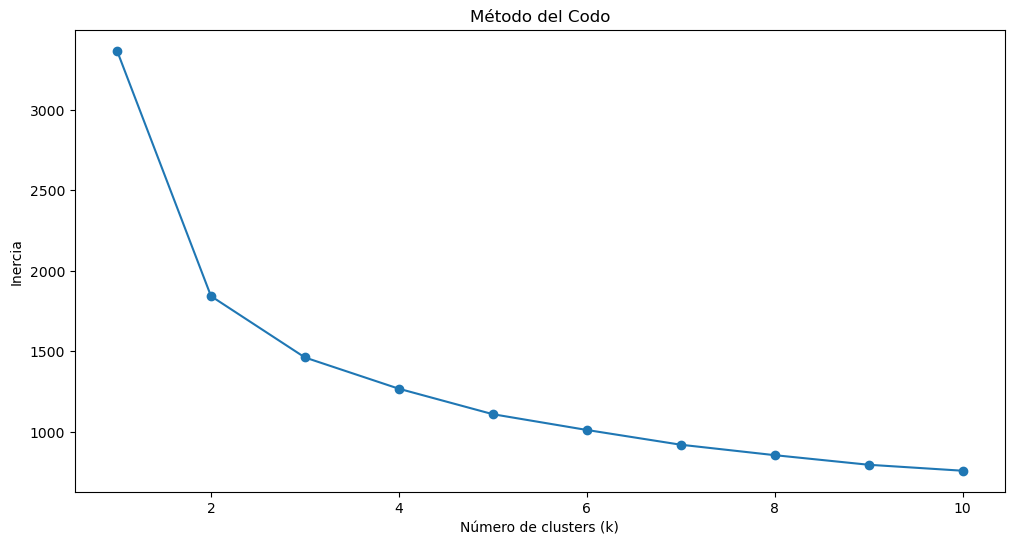

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


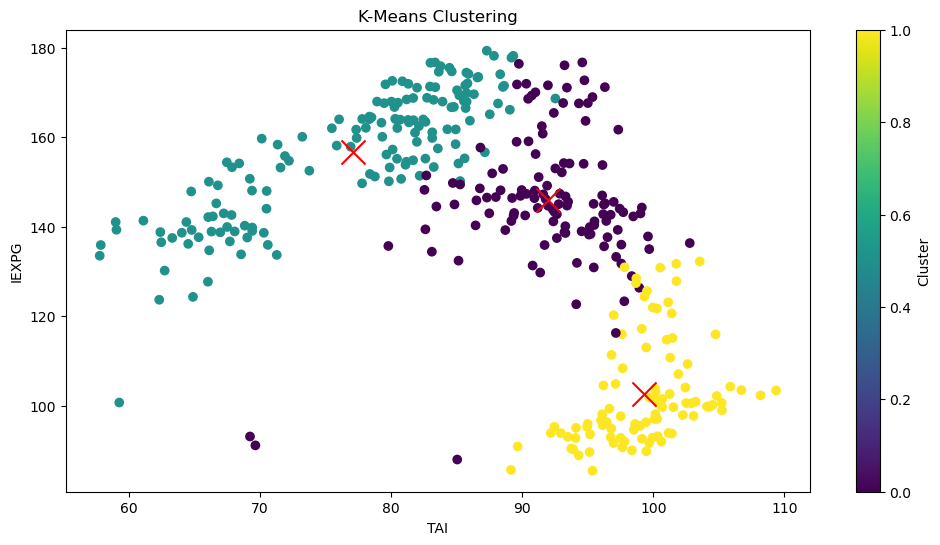

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple, Dict, Any
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("csv/Proyecto.csv")
data_cleaned = data.drop(columns = ["Fecha"])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

Inercia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_scaled)
    Inercia.append(kmeans.inertia_)

plt.figure(figsize = (12, 6))
plt.plot(k_values, Inercia, marker = "o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.savefig(f"img3/Metodo del Codo.png")
plt.show()

optimal_k = 3

kmeans = KMeans(optimal_k, random_state = 42)
data["Cluster"] = kmeans.fit_predict(data_scaled)

centroids = kmeans.cluster_centers_
centroids_descaled = scaler.inverse_transform(centroids)

plt.figure(figsize = (12, 6))
plt.scatter(data["TAI"], data["IEXPG"], c = data["Cluster"], cmap = "viridis")
plt.scatter(centroids_descaled[:, 0], centroids_descaled[:, 1], s = 300, c = "red", marker = "x", label = "Centroides")
plt.xlabel("TAI")
plt.ylabel("IEXPG")
plt.title("K-Means Clustering")
plt.colorbar(label = "Cluster")
plt.savefig(f"img3/Cluster.png")
plt.show()

Accuracy (KNN): 0.7964601769911505
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.79      0.90      0.84        29
           2       0.74      0.59      0.65        29
           3       0.71      0.80      0.75        25

    accuracy                           0.80       113
   macro avg       0.79      0.80      0.79       113
weighted avg       0.80      0.80      0.79       113



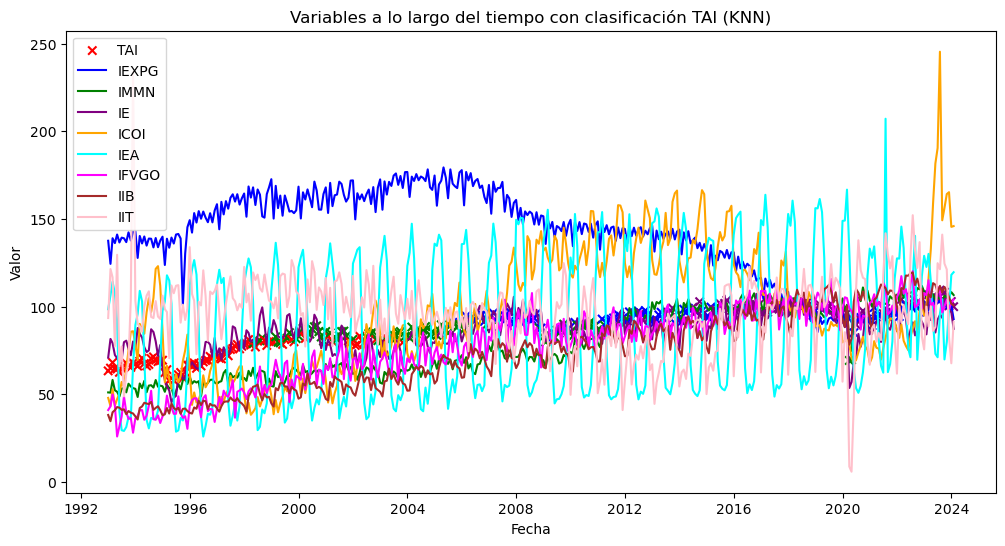

Accuracy (KNN): 0.8053097345132744
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.77      0.83      0.80        29
           2       0.84      0.55      0.67        29
           3       0.74      0.92      0.82        25

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.80       113
weighted avg       0.81      0.81      0.80       113



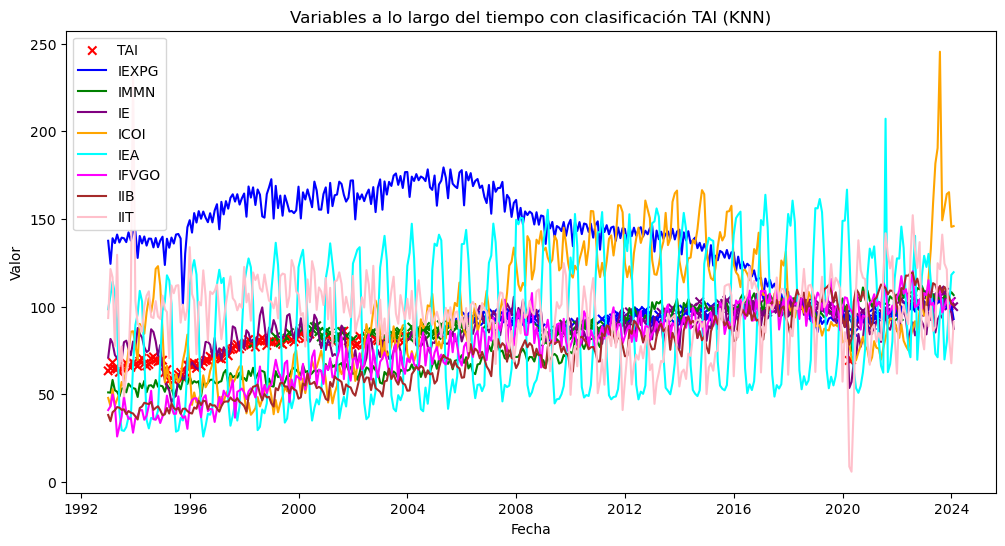

In [57]:
def create_plot(subplots: int = 111) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(figsize = (12, 6), nrows = 1, ncols = 1)
    return fig, ax

def plot_points(ax: plt.Axes, x, y, scatter_params: Dict[str, Any]):
    ax.scatter(x, y, **scatter_params)

def plot_line(ax: plt.Axes, x, y, color, label = "line"):
    ax.plot(x, y, color = color, label = label)

def evaluate_and_plot(model, model_name: str, file_path: str):
    df = pd.read_csv(file_path)
    df['TAI_category'] = pd.qcut(df['TAI'], q = 4, labels = False)

    X = df.drop(['Fecha', 'TAI', 'TAI_category'], axis = 1)
    y = df['TAI_category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy ({model_name}): {accuracy}")
    print(class_report)

    df["Fecha"] = pd.to_datetime(df["Fecha"], format = "%d/%m/%y")

    category_colors = {0: "red", 1: "green", 2: "blue", 3: "purple"}
    df["Predicted_Category"] = model.predict(scaler.transform(df.drop(["Fecha", "TAI", "TAI_category"], axis = 1)))
    df["Color"] = df["Predicted_Category"].map(category_colors)

    fig, ax = create_plot()

    scatter_params = {
        "color": df["Color"],
        "label": "TAI",
        "marker": "x"
    }

    plot_points(ax, df["Fecha"], df["TAI"], scatter_params)

    colors = ["blue", "green", "purple", "orange", "cyan", "magenta", "brown", "pink"]

    variables = ["IEXPG", "IMMN", "IE", "ICOI", "IEA", "IFVGO", "IIB", "IIT"]

    for var, color in zip(variables, colors):
        plot_line(ax, df["Fecha"], df[var], color = color, label = var)

    ax.legend()
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.title(f"Variables a lo largo del tiempo con clasificación TAI ({model_name})")
    plt.savefig(f"img2/bplt{model_name}_classification_plot.png")
    plt.show()

evaluate_and_plot(KNeighborsClassifier(n_neighbors = 5), "KNN", "csv/Proyecto.csv")
evaluate_and_plot(KNeighborsClassifier(n_neighbors = 3), "KNN", "csv/Proyecto.csv")